# Linear Regression with Python

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline

### Check out the Data

In [2]:
# Reading Data Set
df = pd.read_csv("student-mat.csv", sep = ";")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
df = df[["G1", "G2", "G3"]] 

In [6]:
df.head()

,G1,G2,G3
0,5,6,6
1,5,5,6
2,7,8,10
3,15,14,15
4,6,10,10


## Training a Linear Regression Model

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the G3 column. We will toss out the other columns because it only has text info that the linear regression model can't use.

### X and y arrays

In [7]:
predict = "G3"
X = np.array(df.drop([predict], 1))
y = np.array(df[predict])

## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

## Creating and Training the Model

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lm.score(x_test, y_test) #Accuracy of the Model. Note: Value may differ each time

0.9501080901557919

In [40]:
prediction = lm.predict(x_test)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [41]:
lm.coef_

array([0.14961024, 0.99070462])

In [42]:
lm.intercept_

-1.843789176841792

In [43]:
cdf = pd.DataFrame(lm.coef_, ("G1", "G2"), columns = ["Coeff"])

In [44]:
cdf

,Coeff
G1,0.149610
G2,0.990705


Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **G1** is associated with an **increase of 0.149610 marks**.
- Holding all other features fixed, a 1 unit increase in **G2** is associated with an **increase of 0.990705**.

# EDA

Let's create some simple plots to check out the data!

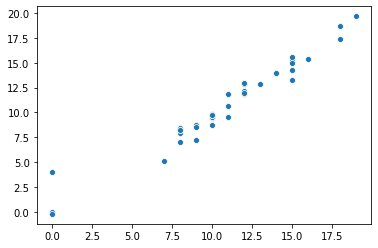

In [46]:
sns.scatterplot(y_test, prediction)

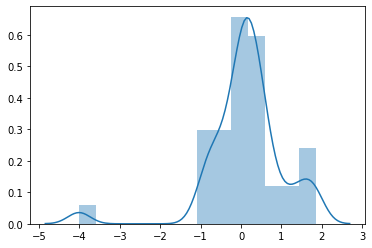

In [47]:
sns.distplot((y_test - prediction))

In [49]:
print("prediction     Actual Value")
prediction = lm.predict(x_test)
for x in range(len(prediction)):
    print("{}                 {}".format(int(round(prediction[x])),y_test[x]))       

prediction     Actual Value
13                 13
0                 0
12                 12
8                 8
15                 15
9                 10
9                 9
12                 12
15                 16
14                 15
10                 10
4                 0
10                 10
7                 8
12                 11
9                 10
17                 18
15                 15
7                 9
13                 12
8                 8
14                 14
0                 0
10                 11
10                 10
13                 15
19                 18
20                 19
12                 12
8                 8
10                 10
8                 8
5                 7
14                 14
13                 12
16                 15
10                 10
9                 9
12                 12
11                 11


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [50]:
# Regression Evaluation Metrics : Calculates the Error
metrics.mean_absolute_error(y_test, prediction)

0.6206591399210899

In [51]:
metrics.mean_squared_error(y_test, prediction)

0.9200068175271994

In [52]:
np.sqrt(metrics.mean_squared_error(y_test, prediction))

0.9591698585376833

### Abhishek Tripathi
<a href='https://www.linkedin.com/in/abhi7585/'> Linkedln

# Thank you